#1 Muat Dataset dan Import liblary

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


In [4]:
# Memuat dataset
df = pd.read_csv('/content/Breast_cancer_data.csv')
print(df.info())  # Informasi dataset
print(df.describe())  # Statistik deskriptif


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB
None
       mean_radius  mean_texture  mean_perimeter    mean_area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.78000

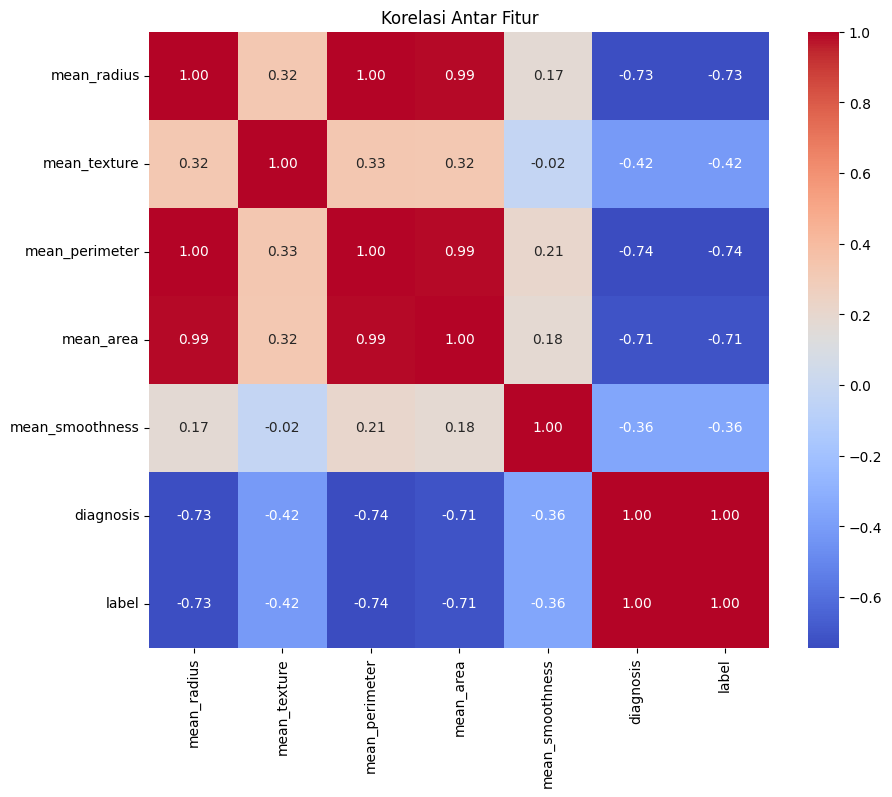

In [10]:
# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Antar Fitur")
plt.show()


#Pre-porsessing

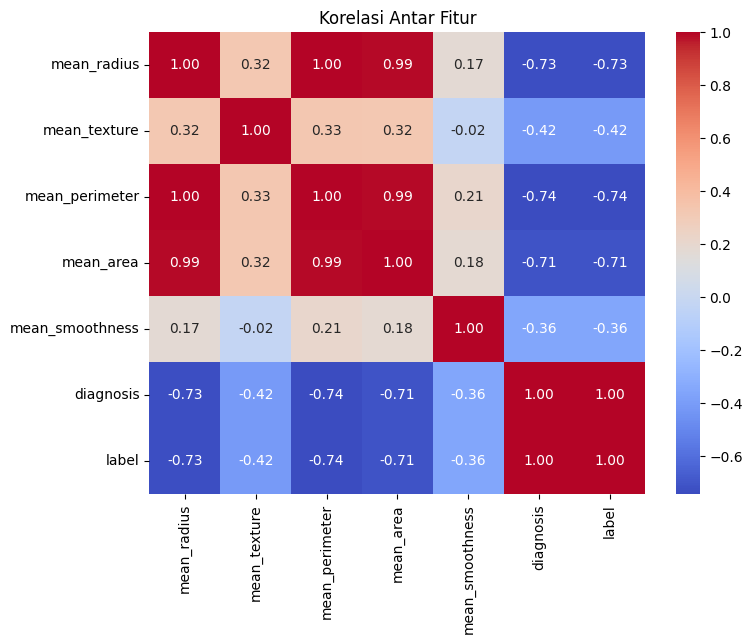

Fitur yang dihapus karena korelasi tinggi: {'label', 'mean_area', 'mean_perimeter'}
Data Asli:
      mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92

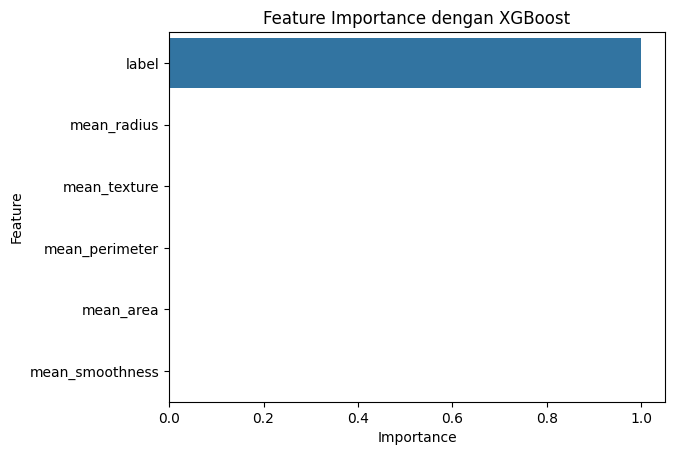

In [18]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi antar fitur
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()

# Menghapus fitur dengan korelasi tinggi (contoh threshold > 0.95)
threshold = 0.95
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

df_reduced = df.drop(columns=correlated_features)
print("Fitur yang dihapus karena korelasi tinggi:", correlated_features)

from sklearn.preprocessing import StandardScaler
df['label'] = df['diagnosis']

# Memisahkan fitur dan target
X = df.drop(columns=['diagnosis'])
Y = df['diagnosis']


# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menampilkan hasil
print("Data Asli:\n", df)

print("\nData Setelah Normalisasi (X_scaled):\n", X_scaled)

model = XGBClassifier(random_state=42)
model.fit(X, Y)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:\n", feature_importances)

# Visualisasi Feature Importance
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance dengan XGBoost")
plt.show()


#membagi data latih dan data uji

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Jumlah data latih: {X_train.shape[0]}, Jumlah data uji: {X_test.shape[0]}")

Jumlah data latih: 455, Jumlah data uji: 114


In [5]:
!pip install xgboost scikit-learn pandas numpy matplotlib seaborn
!pip install scikit-learn==1.3.0
!pip install xgboost --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 56.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.3.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.0 which is incompatible.


#Hyperparameter Tunning
GridSearchCV

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# **Buat instance classifier XGBoost**
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42) # Inisialisasi objek classifier XGBoost dan tetapkan ke variabel 'model'

# Definisikan parameter grid untuk tuning
param_grid = {
    'n_estimators': [50, 100, 200],             # Jumlah pohon
    'learning_rate': [0.01, 0.1, 0.2],          # Kecepatan pembelajaran
    'max_depth': [3, 4, 5],                      # Kedalaman pohon
    'min_child_weight': [1, 5, 10],              # Berat minimum anak node
    'subsample': [0.8, 0.9, 1.0],                # Proporsi sampel
    'colsample_bytree': [0.8, 0.9, 1.0],         # Proporsi fitur untuk setiap pohon
    'gamma': [0, 0.1, 0.5],                     # Gamma untuk kontrol kompleksitas pohon
}

# Gunakan GridSearchCV untuk mencari kombinasi terbaik dari hyperparameter
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Latih model menggunakan GridSearchCV
grid_search.fit(X_train, Y_train)

# Tampilkan hasil terbaik
print("Parameter terbaik yang ditemukan: ", grid_search.best_params_)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Parameter terbaik yang ditemukan:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}


#Evaluasi dan Visualisasi

In [15]:
# Gunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(Y_test, Y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        71

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



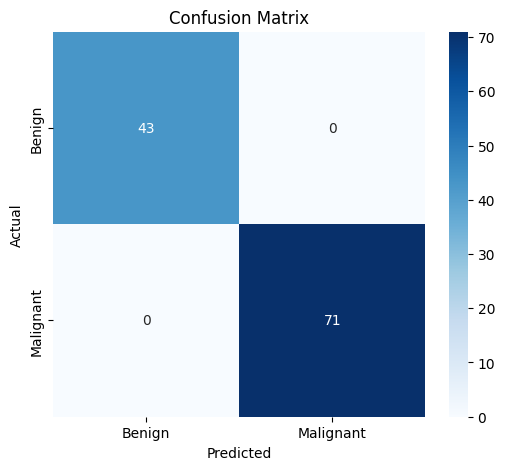

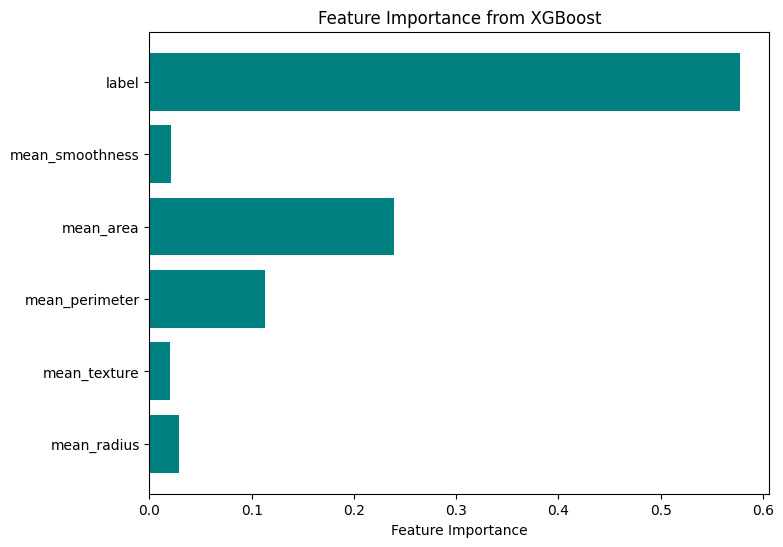

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# 1. Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Feature Importance (untuk XGBoost)
feature_importance = best_model.feature_importances_

# Visualisasi Feature Importance
plt.figure(figsize=(8, 6))
plt.barh(X.columns, feature_importance, color='teal')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from XGBoost')
plt.show()
